## Get the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

## Nearest neighbors

### K-nearest neighbors classifier

The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label of the new point from these. This is the simplest possible classifier.

Put simply the KNN classifier takes the k closest neighbours of an unlabelled datapoint, measures closeness according to all relevant dimensions and classifies unlabelled data point by majority vote. Thereby the classifier creates a set of **'decision boundaries'**.

The number k determines how many samples are considered relevant neighbors. A <u>low k is selective and fits the labels close to the training data</u>. This implies a complex model that is prone to **overfitting**. A high k is inclusive. It implies a smooth decision boundary and a simpler model, but - if taken too far - runs the risk of ignoring training data patterns, i.e **underfitting**.

## Evaluation based on confusion matrix

In [6]:
iris = datasets.load_iris()
iris_X, iris_y = datasets.load_iris(return_X_y=True) 
iris_y = iris_y == 2  # convert to binary

from sklearn import model_selection as skmos
X_train, X_test, y_train, y_test = skmos.train_test_split(iris_X, iris_y, test_size=0.3, random_state=21, stratify=iris_y)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # instantiate estimator
knn.fit(X_train, y_train)  # fit the estimator
y_pred = knn.predict(X_test)  # predict test targets

A confusion matrix, which informs on the accuracy of classification, can be produced through the appropriate method or be directly plotted.

[[0.64444444 0.02222222]
 [0.         0.33333333]]


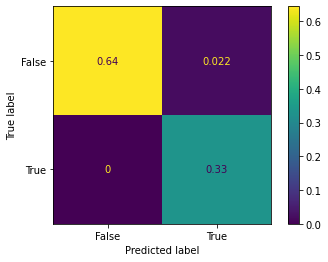

In [7]:
from sklearn import metrics
cfm = metrics.confusion_matrix(y_test, y_pred, normalize='all')  # simple normalized confusion matrix
print(cfm)
metrics.plot_confusion_matrix(knn, X_test, y_test, normalize='all')  # confusion matrix applied directly to model

Scikit-learn offers various evaluation metrics for classifiers,

**Accuracy classification score**: The accuracy_score function computes the accuracy, either the fraction (default) or the count (normalize=False) of correct predictions.

**Balanced accuracy score**:
Balanced accuracy is the average of *sensitivity* (true positive rate or recall) and *specificity* (true negative rate). Sensitivity answers the question: 'How many of the positive cases did I detect?' Specificity answers that same question but for the negative cases. In contrast to standard accuracy, balanced accuracy attempts to account for the imbalance in classes.

**Precision/recall metrics**:
<u>Precision is the ratio of true positives to the sum of true and false positives</u>. As a success metric it penalizes particularly a 'tight net' for capturing the positives. By contrast, <u>recall is the ratio of true positives to the sum of true positives and false negatives</u>. The recall metric penalizes particularly a 'wide net' for capturing positives. There is evidently a trade-off between precision and recall. The greater the emphasis on avoiding false positives, the greater the emphasis on precision. The more one focuses on avoiding missing out on positive, the greater the emphasis on recall.
In a classifier the trade-off is often managed through the threshold level that divides the classification. Typically, <u>a low threshold gives low precision but high recall</u>. A high threshold gives high precision but low recall.
The **Receiver Operating Characteristic (ROC) curve** shows how the recall versus precision relationship changes as we vary the threshold for identifying a positive in our model.
* For a good blend of precision and recall we can combine the two metrics to an the **F1 score**. The F1 score is the <u>harmonic mean of precision and recall values</u>, taking both metrics into account. It is precision times recall divided by the average of precision and recall. The harmonic mean punishes extreme values. SKL offers various F1 scores for binary, averaged, and multilabel samples.
* The **average precision score** summarizes a precision-recall curve as the <u>weighted mean of precisions achieved at each threshold</u>, with the increase in recall from the previous threshold used as the weight. This only works with a binary class.

In [4]:
acz = metrics.accuracy_score(y_test, y_pred)
baz = metrics.balanced_accuracy_score(y_test, y_pred)
wf1 = metrics.f1_score(y_test, y_pred, average='weighted')
apr = metrics.average_precision_score(y_test>1, y_pred>1)
print(f'Accuracy: {acz}\nBalanced accuracy: {baz}\nWeighted F1 score: {wf1}\nAverage precision: {apr}')

Accuracy: 0.9777777777777777
Balanced accuracy: 0.9777777777777779
Weighted F1 score: 0.9777530589543938
Average precision: 0.9375


In [8]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      0.97      0.98        30
        True       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## Tryouts